In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
columns= ["duration", "protocol type", "service", "flag", "src bytes", "dst bytes", "land", "wrong fragment", "urgent", "hot", "num failed logins", "logged in", "num compromised", "root shell", "su attempted", "num root", "num file creations", "num shells", "num access files", "num outbound cmds", "is host login", "is guest login", "count", "srv count", "serror rate", "srv serror rate", "rerror rate", "srv rerror rate", "same srv rate", "diff srv rate", "srv diff host rate", "dst host count", "dst host srv count", "dst host same srv rate", "dst host diff srv rate", "dst host same src port rate", "dst host srv diff host rate", "dst host serror rate", "dst host srv serror rate", "dst host rerror rate", "dst host srv rerror rate", "label"] 
df = pd.read_csv("kddcup.data.corrected", sep="," , names=columns, index_col=None)

In [4]:
df.shape

(4898431, 42)

데이터 프레임 차원 출력

In [5]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

service 데이터 프레임 중 "http" 열을 잡아서 삭제 후 라벨 제거 (1열, service 열) (axis=0->행, axis=1->열)

In [6]:
df.shape

(623091, 41)

삭제 후 데이터 프레임 차원

In [7]:
df["label"].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

전체 데이터 중 공격은 0.6% 정도

In [8]:
df.head(5)

,duration,protocol type,flag,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,...,dst host srv count,dst host same srv rate,dst host diff srv rate,dst host same src port rate,dst host srv diff host rate,dst host serror rate,dst host srv serror rate,dst host rerror rate,dst host srv rerror rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
for col in df.columns:
    if df[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

데이터 프레임의 열마다 string을 잡아서 라벨 인코딩을 한다. encoded를 labelEncoder로 선언 후 , 데이터 프레임의 모든 열을 fit을 통해 전달 후 transform 을 통해 변환

In [10]:
df.head(5)

,duration,protocol type,flag,src bytes,dst bytes,land,wrong fragment,urgent,hot,num failed logins,...,dst host srv count,dst host same srv rate,dst host diff srv rate,dst host same src port rate,dst host srv diff host rate,dst host serror rate,dst host srv serror rate,dst host rerror rate,dst host srv rerror rate,label
0,0,0,9,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,9,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,9,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,9,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,9,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


tcp, SF등 문자열(범주형 데이터)들이 숫자로 변경된 걸 확인할 수 있다.

In [11]:
for f in range(0,3):
    df = df.iloc[np.random.permutation(len(df))]
    
df2 = df[:500000]
labels = df2["label"]
df_validate = df[500000:]
x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.2, random_state = 42)

x_val, y_val = df_validate, df_validate["label"]

iloc은 데이터 프레임의 행을 선택하는 메서드, 대괄호 안에 선택하는 방식이 있다. 현재는 random_permutation으로 선택한다.
df2는 처음 500,000개의 항목, labels는 df2중 "label"열을 선택한 것, df_validate는 처음 500,000개 이후의 데이터.

train_test_split은 데이터를 훈련 세트와 시험 세트로 분할하는 함수.
x는 훈련 데이터, y는 훈련 레이블. test_size % 만큼 (ramdom_state를 난수 생성기를 초기화할때 사용하며 생성한) 랜덤값을 이용해 선택한다.

이후 500,000개 이후의 값들인 x_val과 그중 label을 모아놓은 y_val은 검증 세트로 사용한다.

훈련 데이터는 말 그대로 train시킬때 사용하는 데이터, 시험 데이터는 train시킨 모델을 시험하는데 사용하는 데이터, 검증 데이터는 훈련 중 모델의 훈련 상황을 측정하기 위해 사용한다.

In [12]:
isolation_forest = IsolationForest(n_estimators = 100, max_samples = 256, contamination = 0.1, random_state = 42)

n_estimators = 100 -> 포레스트에 사용할 트리 수(100이 default)  
mas_samples -> 최대 포인트 개수(256 or min of samples 이 default)  
contamination(오염) -> 이상 징후/특이값으로 간주되어야 하는 전체 데이터 세트의 백분율(10%가 default)  
random_state -> 난수 생성기에 사용하는 값. 해당 모델은 난수 생성기를 많이 이용한다.

In [13]:
isolation_forest.fit(x_train)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

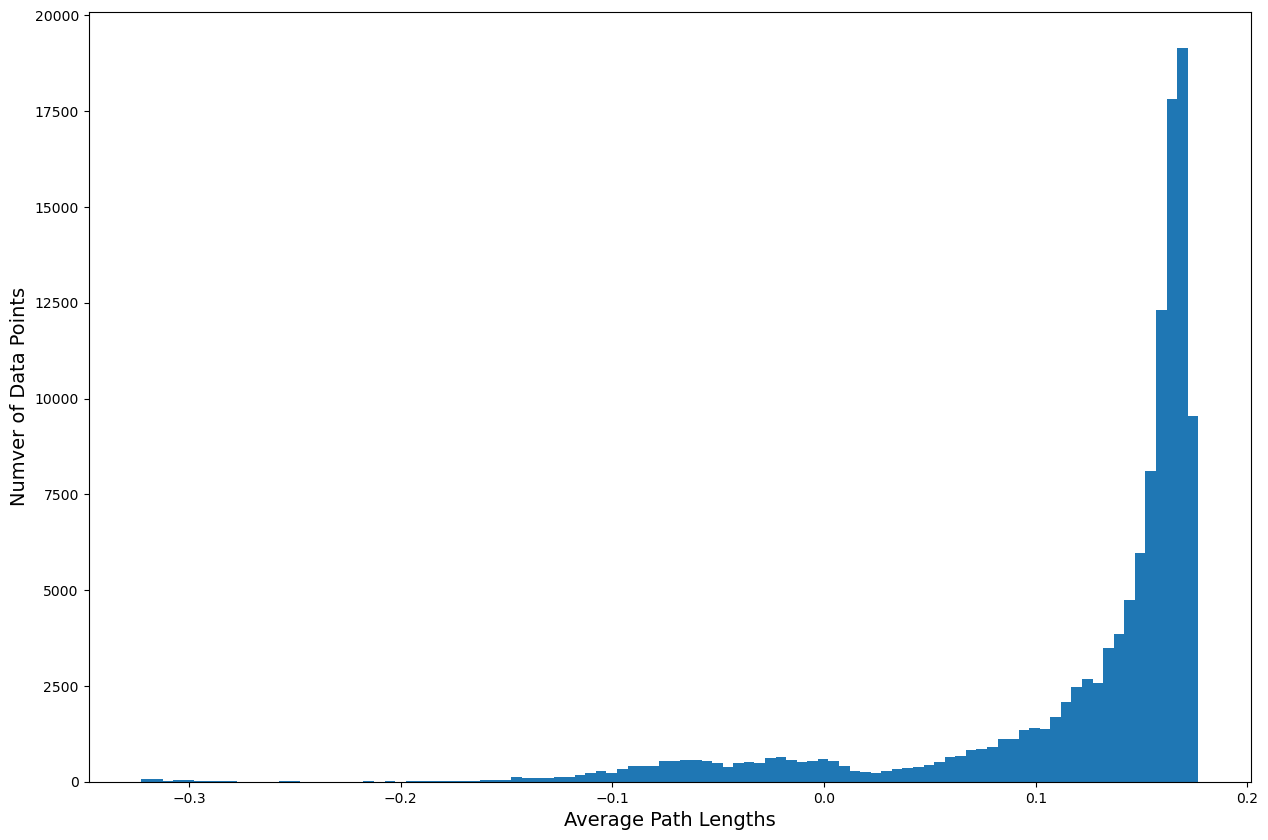

In [14]:
anomaly_scores = isolation_forest.decision_function(x_val)
plt.figure(figsize = (15,10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize = 14)
plt.ylabel('Numver of Data Points', fontsize = 14)
plt.show()

anomaly_scores -> 히스토그램에 표현하는 데이터, bins -> 구간 수.
위 히스토그램을 보면 길이가 음수인 경우가 이상치이다.

In [16]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies, matches)
print("AUC:     {:.2%}".format(auc))

AUC:     95.38%


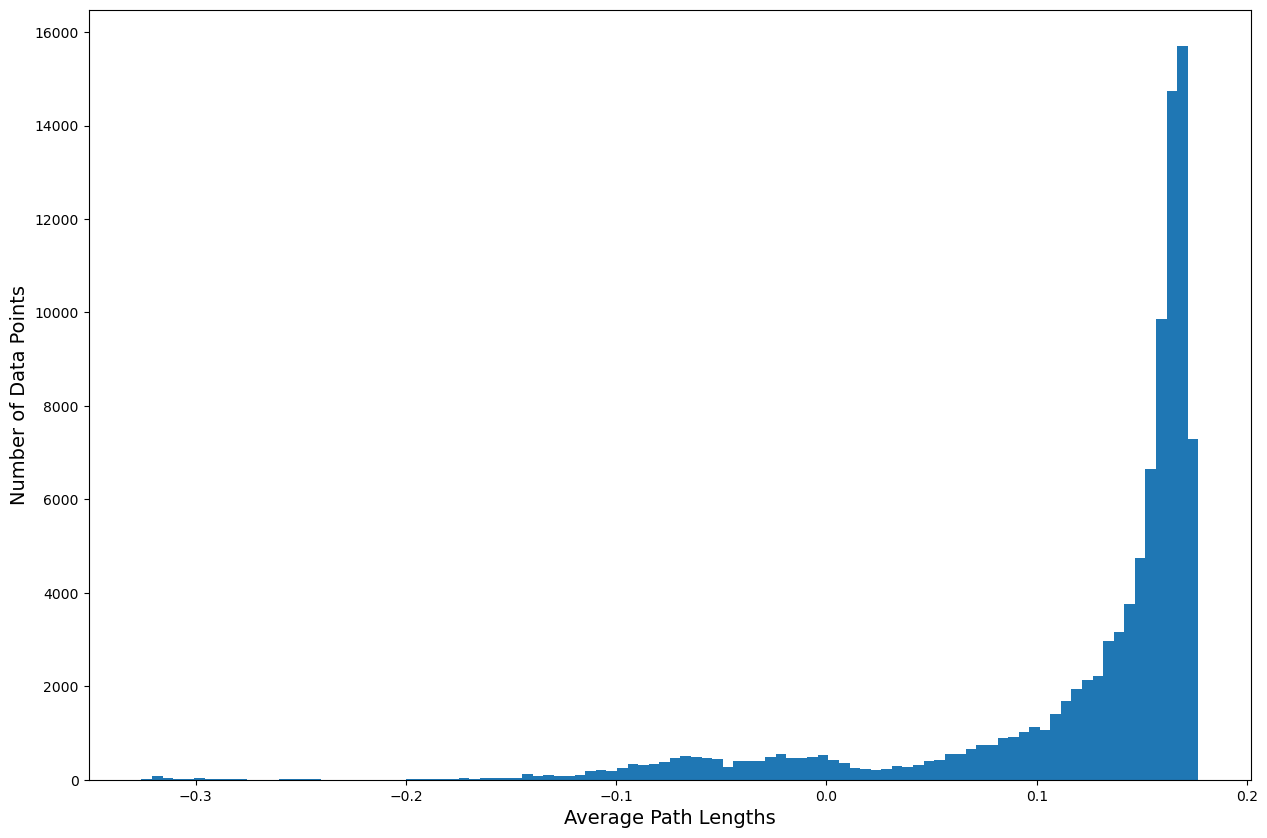

In [17]:
anomaly_scores_test = isolation_forest.decision_function(x_test)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()


In [18]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test, matches)
print("AUC: {:.2%}".format(auc))

AUC: 96.66%
